<a href="https://colab.research.google.com/github/Tommy3072/MineriaDeDatos/blob/main/Taller9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     balance_control  duracion_prestamo  historial_credito  proposito  monto  \
0                  1                  6                  4          8   1169   
1                  2                 48                  1          8   5951   
2                  4                 12                  4          5   2096   
3                  1                 42                  1          6   7882   
4                  1                 24                  5          2   4870   
..               ...                ...                ...        ...    ...   
995                4                 12                  1          6   1736   
996                1                 30                  1          3   3857   
997                4                 12                  1          8    804   
998                1                 45                  1          8   1845   
999                2                 45                  4          3   4576   

     saldo_ahorro  longitud_empleo  tas

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[[106  14]
 [ 54  26]]
[[102  18]
 [ 49  31]]
[[89 31]
 [42 38]]
              precision    recall  f1-score   support

           1       0.66      0.88      0.76       120
           2       0.65      0.33      0.43        80

    accuracy                           0.66       200
   macro avg       0.66      0.60      0.60       200
weighted avg       0.66      0.66      0.63       200

              precision    recall  f1-score   support

           1       0.68      0.85      0.75       120
           2       0.63      0.39      0.48        80

    accuracy                           0.67       200
   macro avg       0.65      0.62      0.62       200
weighted avg       0.66      0.67      0.64       200

              precision    recall  f1-score   support

           1       0.68      0.74      0.71       120
           2       0.55      0.47      0.51        80

    accuracy                           0.64       200
   macro avg       0.62      0.61      0.61       200
weighted 

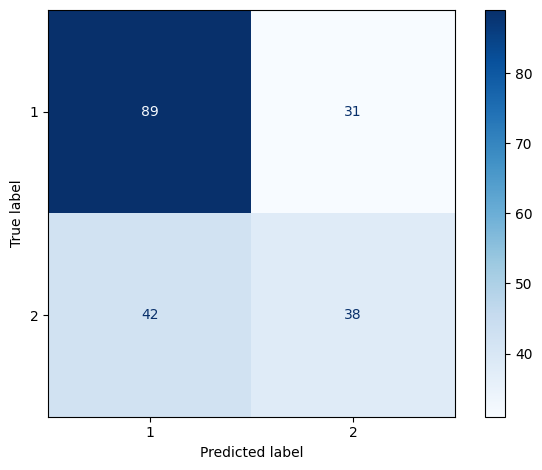

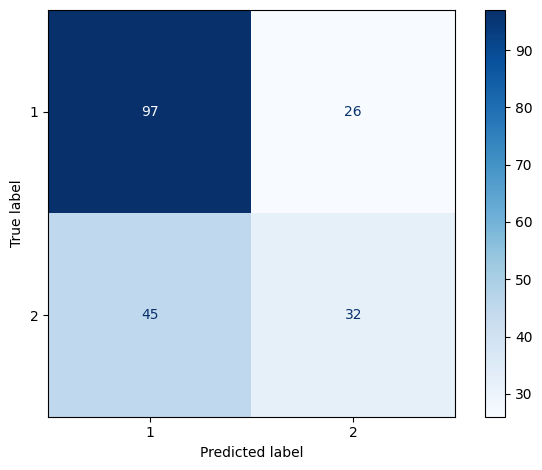

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn import svm #SVM
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler #Para estandarizar los datos

df = pd.read_csv("credito.csv")
print(df)

X = df[["edad", "alojamiento", "monto", "duracion_prestamo", "proposito", "trabajador_extranjero"]]
y = df["telefono"]

'''
 Framework heldout y lo que haremos es dividir el dataset en
60% training
40% evaluar (temp) => 20% evaluacion y 20% test
'''

x_train, x_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4,train_size=0.6)
x_test, x_eval, y_test, y_eval = train_test_split(x_temp,y_temp,test_size = 0.5,train_size =0.5)

#escalamiento de los datos
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_eval = scaler.transform(x_eval)
x_test = scaler.transform(x_test)


print (len(x_train))
print (x_train)
print (len(x_eval))
print (x_eval)
print (len(x_test))
print (x_test)

#Me genera el modelo es decir entreno ... ok????
#criterion = gini|entropy

#modelo
model = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=0.0001, C=1.8, multi_class='crammer_singer', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000).fit(x_train, y_train)
#model2 = svm.SVC(C=1.0, kernel='sigmoid', degree=2, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None).fit(x_train, y_train)
model3 = KNeighborsClassifier(n_neighbors=3,metric='euclidean').fit(x_train, y_train)
model2 = LogisticRegression().fit(x_train, y_train)
print (str(model2.classes_))
print (y)
#Despues de entrenar el modelo, yo voy a ver como le va en el de evaluacion (20%)
#print (str(model.predict_proba(x_eval)))
print (str(model.predict(x_eval)))


cm_svm  = confusion_matrix(y_eval, model.predict(x_eval), labels=model2.classes_)
cm_lr   = confusion_matrix(y_eval, model2.predict(x_eval), labels=model2.classes_)
cm_knn  = confusion_matrix(y_eval, model3.predict(x_eval), labels=model3.classes_)
#esta funcion construye el grafico de la matriz de confusion
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=model2.classes_)
disp_svm.plot(cmap=plt.cm.Blues,values_format='d')
plt.tight_layout()
#Graba el grafico en un archivo
plt.savefig("knn-eval.png")
#te imprime por pantalla la matriz de confusion
print (str(cm_svm))
print (str(cm_lr))
print (str(cm_knn))
#te imprime las metricas: recall, precision, accuracy
print(classification_report(y_eval, model.predict(x_eval)))
print(classification_report(y_eval, model2.predict(x_eval)))
print(classification_report(y_eval, model3.predict(x_eval)))

#print (str(model.predict_proba(x_test)))
#print (str(model.predict(x_test)))
cm_2 = confusion_matrix(y_test, model3.predict(x_test), labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2,display_labels=model2.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.tight_layout()
plt.savefig("knn-test.png")
print (str(cm_2))
print(classification_report(y_test, model.predict(x_test)))
print(classification_report(y_test, model2.predict(x_test)))
print(classification_report(y_test, model3.predict(x_test)))